# 案例1-信用卡欺诈数据分析及防欺诈模型的构建
---

## 1. 项目背景

信用卡欺诈是传统金融行业的范畴，信用卡企债行为包括利用信用卡透支消费的特点，以非法占有为目的，经发卡银行催收后仍不归还透支款或者在大量透支后潜逃隐瞒身份、以逃避还款责任的行为。出现信用卡被欺诈使用的情况通常有几下几种：

- 卡不在场：欺诈者通过盗取卡和人的相关信息（卡号、有效期、姓名）进行交易；
- 卡被伪造：通过一定设备读取真实磁条卡的信息，并伪造信用卡；
- 卡丢失或被盗：持卡人在挂失前被欺诈使用；
- 身份信息被盗：欺诈分子通过盗取电话账单、水电费账单、银行对账单等信息，以他人名义申请信用卡；
- 卡邮寄被盗：信用卡在邮寄过程中被盗

## 2. 项目数据

**数据来源**：[信用卡欺诈检测数据集 - DF,CCF大数据竞赛平台](https://www.datafountain.cn/dataSets/7/details)

**数据集内容**：数据集包含2013年9月由欧洲持卡人通过信用卡进行的交易。

**数据详述**：

- 数据列表

  该数据集包含1个文件：

  1. creditcard.csv : 包含信用卡交易的金额、时间、数量等信息。
  
- 整体特征
  
数据集合名称|数据类型|字段数|行数|值缺失|相关任务
----------|------|-----|---|-----|-----|
信用卡欺诈检测|数值数据|31|284807|无|分类

- 属性描述

  文件creditcard.csv包含31个字段，284807行，每一行代表的是一笔交易，具体信息如下：
  
序号|字段名|数据类型|字段描述
----|----|-------|-------
1   |Time|Integer|此交易与数据集中第一个交易之间经过的秒数
2-29|V1-V28|Integer|经PCA转换后数据
30|Amount|Integer|交易金额
31|Class |Integer|在欺诈情况下取值为1，否则取0

## 第一部分：信用卡欺诈数据分析

### 1. 提出问题

根据信用卡数据提供的字段信息，提出以下几个问题：

1. 交易类型中欺诈交易占比多少？

2. 欺诈交易金额呈现什么规律？

3. 使用信用卡交易一般发生在什么时间段？欺诈交易在什么时间段出现高峰？

4. 对新的信用卡交易进行欺诈交易识别，即判断出现欺诈交易的概率？

根据上述问题，整理分析思路：通过对相关特征变量进行EDA探索性数据分析，利用逻辑回归算法建立欺诈模型。

### 2. 了解数据

在导入数据之前，先安装以下工具包：

In [2]:
# seaborn图形包
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /anaconda3/lib/python3.7/site-packages
Requires: numpy, pandas, matplotlib, scipy
Required-by: 


In [4]:
# echarts图形包
!pip show pyecharts

Name: pyecharts
Version: 1.3.1
Summary: Python options, make charting easier
Home-page: https://github.com/pyecharts/pyecharts
Author: chenjiandongx
Author-email: chenjiandongx@qq.com
License: MIT
Location: /anaconda3/lib/python3.7/site-packages
Requires: jinja2, simplejson, prettytable
Required-by: 


In [3]:
# 缺失值可视化包
!pip show missingno

Name: missingno
Version: 0.4.2
Summary: Missing data visualization module for Python.
Home-page: https://github.com/ResidentMario/missingno
Author: Aleksey Bilogur
Author-email: aleksey.bilogur@gmail.com
License: UNKNOWN
Location: /anaconda3/lib/python3.7/site-packages
Requires: matplotlib, scipy, numpy, seaborn
Required-by: 


In [6]:
# scikit-learn机器学习包
!pip show scikit-learn

Name: scikit-learn
Version: 0.21.3
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /anaconda3/lib/python3.7/site-packages
Requires: scipy, joblib, numpy
Required-by: imbalanced-learn


In [7]:
# imblearn包，用于解决样本不均衡问题
!pip show imblearn

Name: imblearn
Version: 0.0
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://pypi.python.org/pypi/imbalanced-learn/
Author: UNKNOWN
Author-email: UNKNOWN
License: UNKNOWN
Location: /anaconda3/lib/python3.7/site-packages
Requires: imbalanced-learn
Required-by: 


#### 4.1 准备工作

##### 导入数据分析和绘图包

In [59]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

import missingno as msno
import warnings

# 设置sns样式，忽略警告
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

##### 导入数据

In [60]:
data = pd.read_csv('creditcard.csv')

#### 4.2  查看数据

##### 第1步：查看数据大小

In [61]:
data.shape

(284807, 31)

##### 第2步：查看前5行

In [62]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,...,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,...,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,...,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,...,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0


可见，上述数据集中有31个数据特征。

其中，V1-V28列对应的数据区间为\[-1,1\]，是经过PCA转换后的数据，无需做其他特征处理。Amount列数据与其他列数据相比数值大小差异大，所以对后续建模时需要进行特征缩放处理。

##### 第3步：查看数据类型

查看数据类型的目的：检查数据是否需要进行类型转换。

In [63]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

可知，上述数据规范，均为数值类型，无需进行数据转换处理。

##### 第4步：查看数据统计信息

- 查看数据统计信息的主要目的：检查数据有无缺失值和异常值
- 查看数据缺失值方法：可以用统计函数describe和缺失值可视化函数missingnso

In [64]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,...,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000
mean,94813.8596,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,88.3496,0.0017
std,47488.1460,1.9587,1.6513,1.5163,1.4159,1.3802,1.3323,1.2371,1.1944,1.0986,...,0.7345,0.7257,0.6245,0.6056,0.5213,0.4822,0.4036,0.3301,250.1201,0.0415
min,0.0000,-56.4075,-72.7157,-48.3256,-5.6832,-113.7433,-26.1605,-43.5572,-73.2167,-13.4341,...,-34.8304,-10.9331,-44.8077,-2.8366,-10.2954,-2.6046,-22.5657,-15.4301,0.0000,0.0000
25%,54201.5000,-0.9204,-0.5985,-0.8904,-0.8486,-0.6916,-0.7683,-0.5541,-0.2086,-0.6431,...,-0.2284,-0.5424,-0.1618,-0.3546,-0.3171,-0.3270,-0.0708,-0.0530,5.6000,0.0000
50%,84692.0000,0.0181,0.0655,0.1798,-0.0198,-0.0543,-0.2742,0.0401,0.0224,-0.0514,...,-0.0295,0.0068,-0.0112,0.0410,0.0166,-0.0521,0.0013,0.0112,22.0000,0.0000
75%,139320.5000,1.3156,0.8037,1.0272,0.7433,0.6119,0.3986,0.5704,0.3273,0.5971,...,0.1864,0.5286,0.1476,0.4395,0.3507,0.2410,0.0910,0.0783,77.1650,0.0000
max,172792.0000,2.4549,22.0577,9.3826,16.8753,34.8017,73.3016,120.5895,20.0072,15.5950,...,27.2028,10.5031,22.5284,4.5845,7.5196,3.5173,31.6122,33.8478,25691.1600,1.0000


通过使用统计信息查看，数据无缺失值。

为进一步验证数据无缺失值，使用缺失值可视化函数：

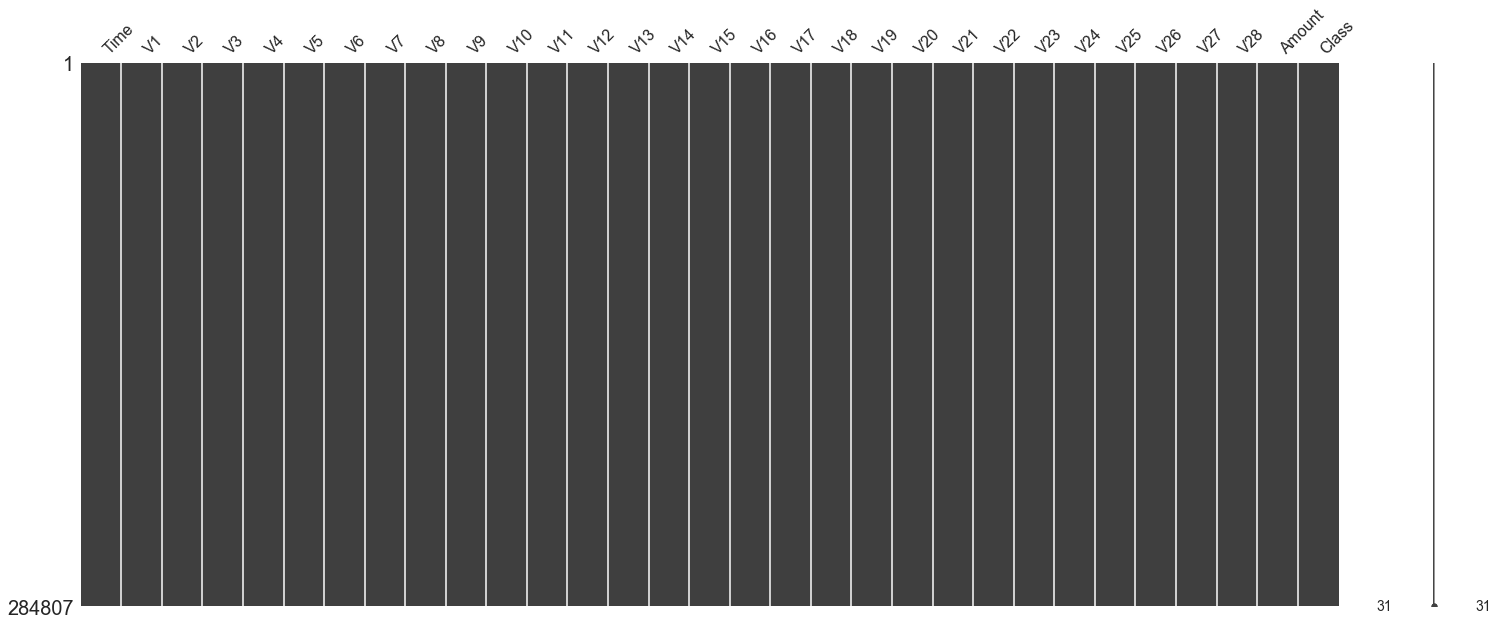

In [65]:
msno.matrix(data)

同样可见：数据集中无缺失值，无需进行缺失值处理。

综上，数据集中数据类型规范一致，且无缺失值和异常值，无需进行数据转换和缺失值异常值处理。

需要注意的是，构建模型前需要对Amount进行特征缩放处理，避免后续算法使用不同列时不会因为数值的大小而导致权重分配不均匀问题。

### 3. 数据清洗

由于文案例中时间特征Time以秒为单位，为了后续方便统计分析信用卡交易发生的时间段，将单位转化为以小时为单位对应每天的时间。

In [66]:
data['Time'].head()

0   0.0000
1   0.0000
2   1.0000
3   1.0000
4   2.0000
Name: Time, dtype: float64

In [67]:
# 时间特征单位转换
data['Time'] = data['Time'].apply(lambda x: divmod(x, 3600)[0])
data['Time'].head()

0   0.0000
1   0.0000
2   0.0000
3   0.0000
4   0.0000
Name: Time, dtype: float64

查看时间特征转换后的前5行，验证时间特征是否转换好：

In [68]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,...,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,0.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,...,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,0.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,...,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,0.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,...,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0


至此，时间特征已清洗完毕。

### 4. 数据分析

根据上述问题进行以下分析：

#### 4.1 信用卡交易中欺诈类的占比情况

接下来对案例中信用卡交易类型进行统计，分别计算出正常交易(Class=0)和欺诈交易(Class=1)出现的次数：

In [69]:
classes = pd.value_counts(data['Class'], sort=True).sort_index()
classes.shape

(2,)

In [70]:
classes.head()

0    284315
1       492
Name: Class, dtype: int64

In [71]:
# 统计0和1出现的频率
classes.value_counts()

284315    1
492       1
Name: Class, dtype: int64

In [72]:
classes[0], classes[1]

(284315, 492)

可见，出现正常交易的次数是284315次，出现欺诈交易的次数是492次，其中欺诈交易占总交易的比例是：

In [73]:
'欺诈交易占比：{0:.2f}%'.format(classes[1] * 100 / (classes[0] + classes[1]))

'欺诈交易占比：0.17%'

将上述结果进行可视化如下：

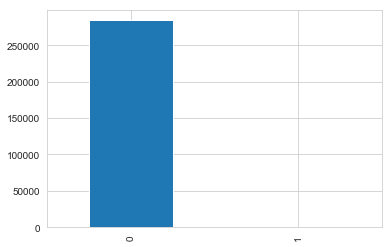

In [74]:
classes.plot(kind = 'bar')

**分析**：样本中的欺诈交易数据和正常交易数据分布非常不均匀，所以在训练模型之前，需要对该部分数据进行预处理，以解决数据分布不均衡问题。

#### 4.2 信用卡交易时间分布情况

分别查看信用卡正常交易和欺诈交易的描述性统计与时间序列分布的关系：

print('正常交易：')
data.Time[data.Class==0].describe()

In [75]:
print('欺诈交易：')
data.Time[data.Class==1].describe()

欺诈交易：


count   492.0000
mean     21.9390
std      13.2834
min       0.0000
25%      11.0000
50%      20.0000
75%      35.0000
max      47.0000
Name: Time, dtype: float64

按照时间对信用卡交易情况进行可视化如下：

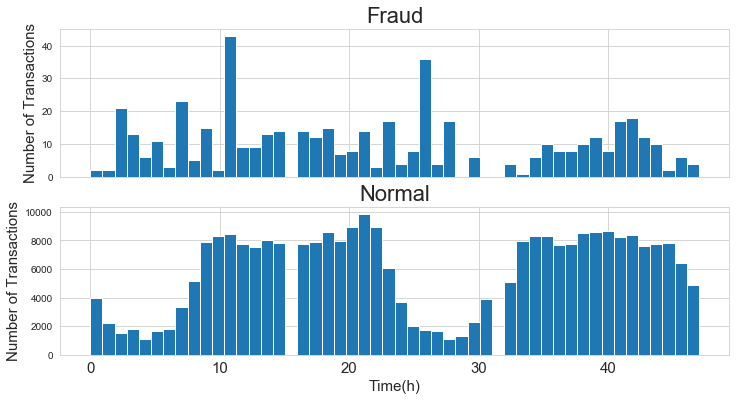

In [76]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6))

bins = 50

ax1.hist(data.Time[data.Class==1], bins=bins)
ax1.set_title('Fraud', fontsize=22)
ax1.set_ylabel('Number of Transactions', fontsize=15)

ax2.hist(data.Time[data.Class==0], bins=bins)
ax2.set_title('Normal', fontsize=22)

plt.xlabel('Time(h)', fontsize=15)
plt.xticks(fontsize=15)

plt.ylabel('Number of Transactions', fontsize=15)
plt.show()

**分析**：上图为信用卡48小时内的交易情况：

- 在信用卡欺诈交易样本中，离群值发生在客户使用信用卡消费更低频的时间段；

- 信用卡欺诈交易数量案发最高峰在第一天上午11点达到47次，其余发生信用卡被盗刷案发时间在晚上时间11点至第二早上9点之间；

- 信用正常交易情况存在一定的周期性规律，可能与持卡人消费习惯有关。

#### 4.3 信用卡欺诈交易金额情况

分别查看信用卡正常交易和欺诈交易的描述性统计与金额的关系：

In [77]:
print('-' * 10 + 'Fraud' + '-' * 10)
data.Amount[data.Class==1].describe()

----------Fraud----------


count    492.0000
mean     122.2113
std      256.6833
min        0.0000
25%        1.0000
50%        9.2500
75%      105.8900
max     2125.8700
Name: Amount, dtype: float64

In [78]:
print('-' * 10 + 'Normal' + '-' * 10)
data.Amount[data.Class==0].describe()

----------Normal----------


count   284315.0000
mean        88.2910
std        250.1051
min          0.0000
25%          5.6500
50%         22.0000
75%         77.0500
max      25691.1600
Name: Amount, dtype: float64

可见，信用卡欺诈交易最大金额是2,125.87美元，数额不大。

按照交易金额对信用卡交易情况进行可视化如下：

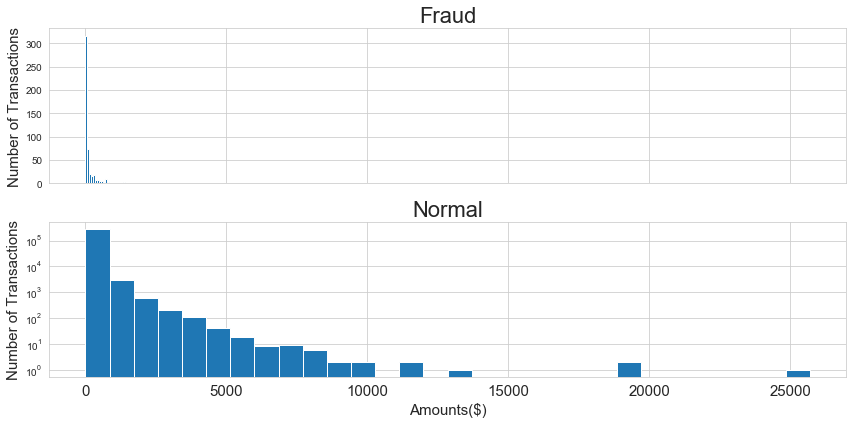

In [79]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6))

bins = 30

fraud_amount = data.Amount[data.Class==1]

ax1.hist(fraud_amount, bins=bins)
ax1.set_title('Fraud', fontsize=22)
ax1.set_ylabel('Number of Transactions', fontsize=15)
# ax1.set_ylim(0,100)
# ax1.set_xlim(0, fraud_amount.max())

normal_amount = data.Amount[data.Class==0]

ax2.hist(normal_amount, bins=bins)
ax2.set_title('Normal', fontsize=22)
#ax2.set_xlim(0, normal_amount.max())

plt.xlabel('Amounts($)', fontsize=15)
plt.xticks(fontsize=15)

plt.ylabel('Number of Transactions', fontsize=15)
plt.yscale('log') # 由于Amount金额数值较大，为平滑数据将y轴进行对数缩放
plt.tight_layout()

plt.show()

**分析**：信用卡欺诈交易的金额非常低，可见金额这一列的数据对分析的参考价值不大。

#### 4.4 各变量的相关性分析

查看各变量之间的相关性，显示部分如下：

In [80]:
data_corr = data.corr()
data_corr.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.0000,0.1177,-0.0106,-0.4196,-0.1052,0.1732,-0.0630,0.0848,-0.0371,-0.0080,...,0.0447,0.1441,0.0512,-0.0162,-0.2332,-0.0414,-0.0052,-0.0094,-0.0107,-0.0123
V1,0.1177,1.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,...,-0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.2277,-0.1013
V2,-0.0106,0.0000,1.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,...,0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.5314,0.0913
V3,-0.4196,-0.0000,0.0000,1.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,...,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.2109,-0.1930
V4,-0.1052,0.0000,-0.0000,-0.0000,1.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,...,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0987,0.1334


查看各变量与Class之间的相关性系数如下：

In [81]:
data_corr['Class'].sort_values(ascending=False)

Class     1.0000
V11       0.1549
V4        0.1334
V2        0.0913
V21       0.0404
V19       0.0348
V20       0.0201
V8        0.0199
V27       0.0176
V28       0.0095
Amount    0.0056
V26       0.0045
V25       0.0033
V22       0.0008
V23      -0.0027
V15      -0.0042
V13      -0.0046
V24      -0.0072
Time     -0.0123
V6       -0.0436
V5       -0.0950
V9       -0.0977
V1       -0.1013
V18      -0.1115
V7       -0.1873
V3       -0.1930
V16      -0.1965
V10      -0.2169
V12      -0.2606
V14      -0.3025
V17      -0.3265
Name: Class, dtype: float64

各变量与Class之间的相关性图表如下：

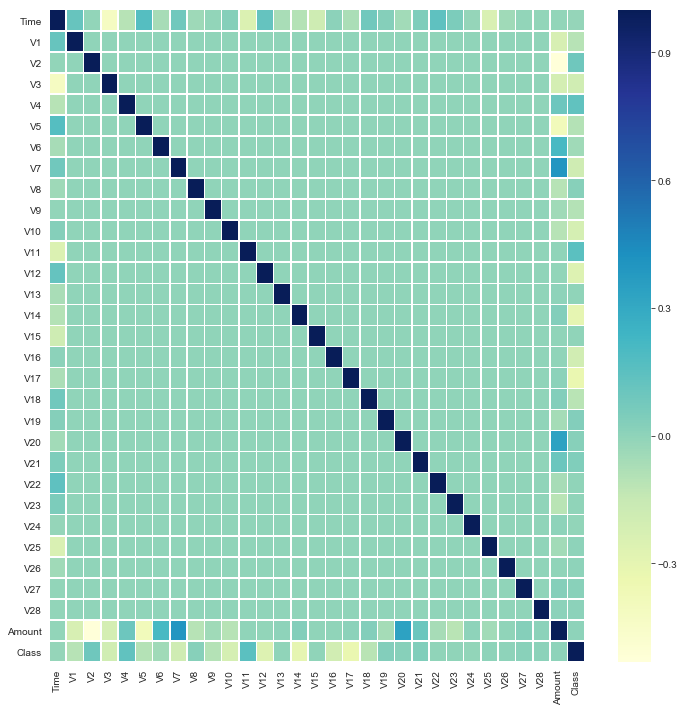

In [94]:
plt.figure(figsize=(12,12))
sns.heatmap(data_corr, vmax=1, square=False, cmap='YlGnBu', lw=0.5)
plt.show()

可知：V11、V4、V2这3个变量对Class的影响较大。

至此，数据分析已完成。

### 5. 分析总结

综合上述分析，结论如下：

- 信用卡交易数据集中出现正常交易的次数是284315次，出现欺诈交易的次数是492次，其中欺诈交易占总交易的比例是0.17%；
- 数据集为信用卡48小时内的交易情况；
- 在信用卡欺诈交易样本中，离群值发生在客户使用信用卡消费更低频的时间段；
- 信用卡欺诈交易数量案发最高峰在第一天上午11点达到47次，其余发生信用卡被盗刷案发时间在晚上时间11点至第二早上9点之间；
- 信用卡欺诈交易最大金额是2,125.87美元，数额不大；
- 信用正常交易情况存在一定的周期性规律，可能与持卡人消费习惯有关；
- 对信用卡正常交易与否影响最大的3个变量是：V11、V4、V2。

## 第二部分：构建信用卡发欺诈模型

### 1. 准备工作

#### 1.1 导入机器学习模型库

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '%.4f'% x)

from imblearn.over_sampling import SMOTE
import itertools

### 2. 特征工程

由于数据集中V1-V28列的数据已经经过特征化处理，所以无需再做其他处理。

但是，
Time和Amount列：数据规格和其他特征相差较大，因此为了避免权重影响，需要要进行特征缩放。
Class列：Class=0和Class=1的个数相差较大，数据分布不均衡。

所以，需要对上述三列数据进行预处理。

#### 2.1 特征缩放：对Time和Amount列标准化处理

##### 第1步：将“Amount”和“Time“放入新的列表中，便于同时进行特征缩放。

In [15]:
cols = ['Amount', 'Time']
data[cols].head()

,Amount,Time
0,149.62,0.0
1,2.69,0.0
2,378.66,0.0
3,123.50,0.0
4,69.99,0.0


##### 第2步：初始化缩放器，并对数据进行标准化

- StandardScaler()：将特征中的值进行标准差标准化，即转换为均值为0，方差为1的正态分布；
  参考网址：[StandardScalers数据预处理](https://blog.csdn.net/u010758410/article/details/78158781)
- fit_transform(trainData)对部分数据先拟合fit，找到该part的整体指标，如均值、方差、最大值最小值等等（根据具体转换的目的），然后对该trainData进行转换transform，从而实现数据的标准化、归一化等等。
  参考网址：[fit_transform](https://blog.csdn.net/weixin_38278334/article/details/82971752)

In [20]:
# 初始化缩放器
sc = StandardScaler()
# 对数据标准化
data[cols] = sc.fit_transform(data[cols])
data[cols].head()

,Amount,Time
0,0.2450,-1.9603
1,-0.3425,-1.9603
2,1.1607,-1.9603
3,0.1405,-1.9603
4,-0.0734,-1.9603


##### 第3步：查看整个数据集data中的'Time'和’Amount‘两列是否完成标准化。

In [21]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.9603,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,0.2450,0
1,-1.9603,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,...,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,-0.3425,0
2,-1.9603,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,...,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,1.1607,0
3,-1.9603,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,...,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,0.1405,0
4,-1.9603,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,...,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,-0.0734,0


可见，Time和Amount两列已完成标准化转换。

#### 2.2 Class列中不平衡数据处理

机器学习中不平衡数据的处理方式有以下几种：

- 常规方法：
  - 上采样：小种类复制多份。弊端：过拟合，上采样后的数据集中会反复出现一些样本，训练处来的模型会有一定的过拟合
  - 下采样：只从大种类中选取部分样本。弊端：欠拟合，最终的训练集丢失了数据，模型只学到了总体模式的一部分
- 改进方法：
  - EasyEnsemble：多次下采样产生多个不同的训练集，以训练多个不同的分类器
  - BalanceCascade：
    - 先通过一次下采样产生训练集，训练一个分类器
    - 那些分类正确的大众样本不放回，然后对这个更小的大众样本下采样产生训练集，训练第二个分类器
  - 数据合成：SMOTE
  - 数据加权：麻烦的地方在于如何设置合适的权重，实际应用中一般让各个分类间的加权损失近似相等
  - 一分类：看成是一分类或异常检测问题
  
本案例通过过采样的改进方法**SMOTE算法**进行数据合成处理不平衡数据问题。

首先了解一下过采样数据集SMOTE算法是什么？

**SMOTE**全称是*Synthetic Minority Oversampling Technique*，即合成少数类过采样技术，它是基于随机过采样算法的一种改进方案，由于随机过采样采取简单复制样本的策略来增加少数类样本，这样容易产生模型过拟合的问题，即使得模型学习到的信息过于特别(Specific)而不够泛化(General)，SMOTE算法的基本思想是对少数类样本进行分析并根据少数类样本人工合成新样本添加到数据集中，具体如下图所示，算法流程如下：

1. 对于少数类中每一个样本$x$，以欧氏距离为标准计算它到少数类样本集 $S_{min}$ 中所有样本的距离，得到其k近邻；
2. 根据样本不平衡比例设置一个采样比例以确定采样倍率$N$，对于每一个少数类样本$x$，从其k近邻中随机选择若干个样本，假设选择的近邻为$\hat{x}$；
3. 对于每一个随机选出的近邻$\hat{x}$，分别与原样本按照如下的公式构建新的样本:
$$
x_{new} = x + rand(0,1) \times(\hat{x} - x)
$$

其中，欧式距离源自N维欧氏空间中两点x1,x2距离公式：
$$
d = \sqrt{\sum_{i=1}^{n}{(x_{1i}-x_{2i})}^2}
$$

接下来用SMOTE算法对不平衡数据进行处理。

##### 第1步：查看处理不平衡数据前情况，下图正样本即为Class=1数据样本，负样本即为Class=0数据样本，代码如下：

In [36]:
x_features = list(data.columns)
X = data[x_features]
y = data['Class']

n_samples = y.shape[0]

n_pos_samples = y[y == 0].shape[0]
n_neg_samples = y[y == 1].shape[0]

print('样本个数：{} \n正例占比：{:.2%} \n负例占比：{:.2%}'.format(
    n_samples, n_pos_samples/n_samples, n_neg_samples / n_samples))

样本个数：284807 
正例占比：99.83% 
负例占比：0.17%


##### 第2步：通过SMOTE方法平衡正负样本，代码如下：

In [38]:
# 处理不平衡数据
sm = SMOTE(random_state=42)
X, y = sm.fit_sample(X, y)

print('通过SMOTE方法平衡正负样本后：')

n_samples = y.shape[0]

n_pos_samples = y[y == 0].shape[0]
n_neg_samples = y[y == 1].shape[0]

print('样本个数：{} \n正例占比：{:.2%} \n负例占比：{:.2%}'.format(
    n_samples, n_pos_samples/n_samples, n_neg_samples / n_samples))
print('特征维数：{}'.format(X.shape[1]))

通过SMOTE方法平衡正负样本后：
样本个数：568630 
正例占比：50.00% 
负例占比：50.00%
特征维数：31


至此，特征处理已完成。

### 3. 建立训练数据集和测试数据集

In [42]:
X_train_oversamples, X_test_oversamples, y_train_oversamples, y_test_oversamples = \
train_test_split(X, y, test_size=0.2, random_state=0)

print('过采样训练集数据特征：', len(X_train_oversamples))
print('过采样训练集数据标签：', len(y_train_oversamples))

print('过采样测试集数据特征：', len(X_test_oversamples))
print('过采样测试集数据标签：', len(y_test_oversamples))

过采样训练集数据特征： 454904
过采样训练集数据标签： 454904
过采样测试集数据特征： 113726
过采样测试集数据标签： 113726


### 4. 模型构建及评估

建立逻辑回归模型并通过AUC值进行模型评估，AUC（Area Under roc Curve）是一种用来度量分类模型好坏的一个标准。AUC值为ROC曲线所覆盖的区域面积，显然，AUC越大，分类器分类效果越好。

- sklearn包：混淆矩阵、分类报告等自动生成；
- sklearn.my_confusion_matrix()函数：混淆矩阵，主要是针对预测出来的结果，和原来的结果对比，算出混淆矩阵。其对每个类别的混淆矩阵都计算出来了，并且labels参数默认是排序了的。
- sklearn.my_classification_report()函数：分类报告，主要针对每个类别给出详细的准确率、召回率和F-值这三个参数和宏平均值，用来评价算法好坏。另外ROC曲线的话，需要是对二分类才可以。

#### 4.1 构建并训练模型

In [53]:
# 构建并训练逻辑回归模型
from sklearn.model_selection import KFold, cross_val_score

lr_model = LogisticRegression(penalty='l2')
lr_model.fit(X_train_oversamples, y_train_oversamples)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
y_test_oversamples

(113726,)

#### 4.2 测试并评估模型

In [54]:
# 查看模型信息
print('-'*20 + 'Logistic Regression Model' + '-'*20)
print(lr_model)

# 查看混淆矩阵
y_pred = lr_model.predict(X_test_oversamples)
print('-'*20 + 'Confusion Matrix' + '-'*20)
print(confusion_matrix(y_test_oversamples, y_pred))

# 查看分类报告
print('-'*20 + "Classification Report" + '-'*20)
print(classification_report(y_test_oversamples, y_pred))

# 查看精度与决策覆盖面
print('Accuracy: {:.6f}'.format(accuracy_score(y_test_oversamples, y_pred)))
print('AUC: {:.6f}'.format(roc_auc_score(y_test_oversamples, y_pred)))

--------------------Logistic Regression Model--------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
--------------------Confusion Matrix--------------------
[[56723     1]
 [    0 57002]]
--------------------Classification Report--------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Accuracy: 0.999991
AUC: 0.999991


由上述结果可见，该模型的分类准确率为0.999，其模型精度即AUC数值为0.999，具有较高精度。后续可利用该模型自动批量化处理信用卡使用数据，完成欺诈风险评估。

### 5. 参考文献

1. [主成分分析（PCA）原理详解](https://blog.csdn.net/program_developer/article/details/80632779)
2. [探索性数据分析(EDA)及其应用](https://link.zhihu.com/?target=http%3A//tech.hqew.com/news_1095930)
3. [缺失值可视化处理--missingno](https://blog.csdn.net/Andy_shenzl/article/details/81633356)
4. [不平衡数据集的处理](https://www.cnblogs.com/kamekin/p/9824294.html)
5. [机器学习中不平衡数据的处理方式](https://blog.csdn.net/zk_ken/article/details/82013965)
6. [类别不平衡问题之SMOTE算法（Python imblearn极简实现](https://www.cnblogs.com/lvdongjie/p/11489743.html)
7. [欧式距离、标准化欧式距离、马氏距离、余弦距离](https://blog.csdn.net/Kevin_cc98/article/details/73742037)
8. [python sklearn包--混淆矩阵、分类报告等自动生成](http://blog.csdn.net/Kevin_cc98/article/details/73742037)
9. [ROC曲线与AUC值](https://www.cnblogs.com/gatherstars/p/6084696.html)